This notebook is the result of homework in statistic section

**Created by:** Ari Sulistiyo Prabowo

If you have any questions or suggestion towards these solutions. Please contact me down below:
- [LinkedIn](https://www.linkedin.com/in/ariprabowo/)
- [Medium](https://dataimpact.medium.com/)

____

In [ ]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10737 sha256=357818bf5557053f4d31daaeabb74411fa01ad40a87889ddeeacdbcc2b6871a7
  Stored in directory: /root/.cache/pip/wheels/34/22/5f/9ba9db604d08670e283b2e04551dd407f44cf889fdb9617ce5
Successfully built empiricaldist


In [ ]:
#import library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from empiricaldist import Pmf, Cdf

from scipy.stats import skew
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Basic Statistic
**Dataset:** https://www.kaggle.com/sakshigoyal7/credit-card-customers 

Dalam menentukan apakah customer akan tetap menggunakan product atau tidak makan perlu dilakukan untuk mengukur statistik pada data credit card customer:
1. Pada kolom customer_age, total_trans_amt, dan total_trans_ct, coba lakukan perhitungan rata-rata, median, modus, dan standar deviasi-nya. 
2. Berikan rangkuman singkat dari hasil perhitungan tiap kolomnya 
Pada kolom education, dan marital_status, lakukan perhitungan proporsi. 

*Note*:Berikan rangkuman singkat tiap kolomnya
Cukup kirim pdf dari notebook-nya.


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Question 1

In [ ]:
def question1(kolom):
  mean = data[kolom].mean()
  mode = data[kolom].mode()[0]
  median = data[kolom].median()

  return print("From {} column, it contains mean: {}, median: {}, mode: {}".format(kolom, round(mean,2), round(median,2), round(mode,2)))

In [ ]:
#Customer_Age
question1("Customer_Age")

From Customer_Age column, it contains mean: 46.33, median: 46.0, mode: 44


In [ ]:
#Total_Trans_Amt
question1("Total_Trans_Amt")

From Total_Trans_Amt column, it contains mean: 4404.09, median: 3899.0, mode: 4253


In [ ]:
#Total_Trans_Ct
question1("Total_Trans_Ct")

From Total_Trans_Ct column, it contains mean: 64.86, median: 67.0, mode: 81


### Question 2

In [ ]:
def question2(kolom):
  data_new = pd.DataFrame(data[kolom].value_counts(normalize=True)*100)
  data_new = data_new.rename(columns={kolom:'Proportion'})
  return data_new

In [ ]:
#Education_Level
question2("Education_Level")

,Proportion
Graduate,30.887726
High School,19.877555
Unknown,14.999506
Uneducated,14.683519
College,10.002962
Post-Graduate,5.095290
Doctorate,4.453441


Dataset contains that **graduate and high school** are dominated **around 50%** of the total users in terms of education level

In [ ]:
#Marital_Status
question2("Marital_Status")

,Proportion
Married,46.282216
Single,38.935519
Unknown,7.396070
Divorced,7.386195


The majority of users are married and followed by single
___

## Intermediate Statistic
**Dataset:** https://www.kaggle.com/sakshigoyal7/credit-card-customers 

Pada dataset credit card customer, terdapat informasi yang anda bisa lakukan eksplorasi. Hal ini bertujuan untuk melihat data apakah memiliki pola yang nantinya dapat digunakan dalam pembuatan model. Beberapa hal yang harus dilakukan antara lain:
1. Lakukan analisis PMF pada kolom Attrition_Flag
2. Pisahkan data Existing Customer and Attrited customer pada kolom Attrition_Flag
3. Lakukan analisis distribusi pada kolom Total_Trans_Amt dan Total_Trans_Ct serta tentukan skewnessnya
4. Lakukan analisis hubungan/korelasi antara kolom Total_Trans_Amt dan Total_Trans_Ct dan jelaskan apakah memiliki positive, negatif atau netral korelasi


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Question 1

In [ ]:
def question1(kolom):
  pmf_ = Pmf.from_seq(data[kolom])

  return pmf_

In [ ]:
#Attrition_Flag
question1("Attrition_Flag")

,probs
Attrited Customer,0.16066
Existing Customer,0.83934


### Question 2

In [ ]:
def question2(x):
  data_new = data[data['Attrition_Flag'] == x]

  return data_new

In [ ]:
Existing = question2("Existing Customer")
Existing.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
Attrited = question2("Attrited Customer")
Attrited.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,1,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771


### Question 3
Lakukan analisis distribusi pada kolom Total_Trans_Amt dan Total_Trans_Ct serta tentukan skewnessnya

In [ ]:
def question3(attrition, x):
   data_new = question2(attrition)

   value_of_skewness = skew(data_new[x])

   if value_of_skewness < 0:
     skewness = 'Left Skewness'
   else:
     skewness = "Right Skewness"

   display("{} towards {} has {} with value {}".format(attrition, x, skewness, round(value_of_skewness,3))) 
   sns.histplot(data=data_new, x=x)
   return plt.show()
   

'Existing Customer towards Total_Trans_Amt has Right Skewness with value 1.996'

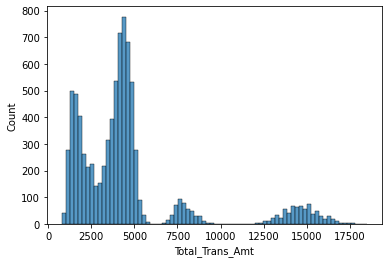

In [ ]:
question3("Existing Customer", x='Total_Trans_Amt')

'Existing Customer towards Total_Trans_Ct has Left Skewness with value -0.004'

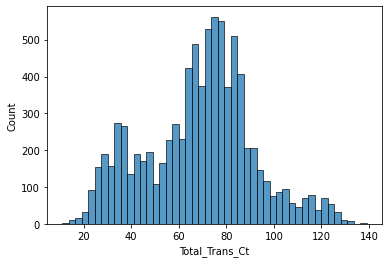

In [ ]:
question3("Existing Customer", x='Total_Trans_Ct')

'Attrited Customer towards Total_Trans_Amt has Right Skewness with value 1.684'

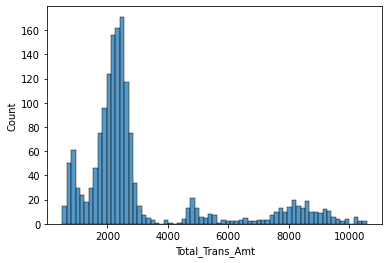

In [ ]:
question3("Attrited Customer", x='Total_Trans_Amt')

'Attrited Customer towards Total_Trans_Ct has Right Skewness with value 0.485'

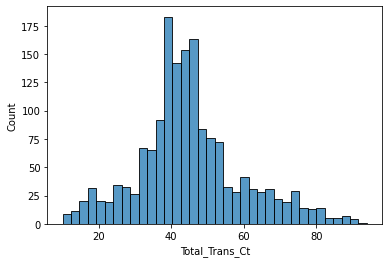

In [ ]:
question3("Attrited Customer", x='Total_Trans_Ct')

### Question 4

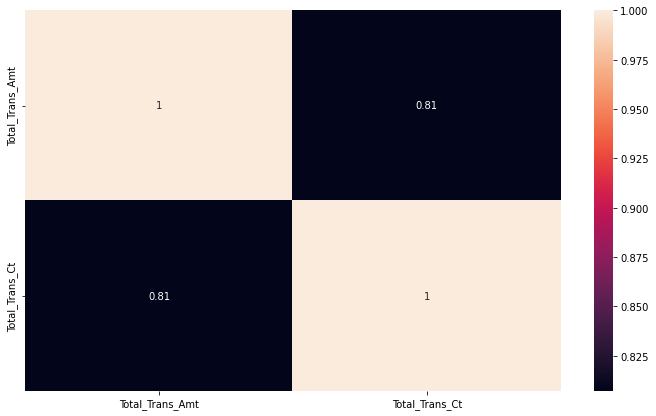

In [ ]:
#All type of customer
all_target_variable = data[['Total_Trans_Amt','Total_Trans_Ct']]
plt.figure(figsize=(12,7))
sns.heatmap(all_target_variable.corr(), annot=True)
plt.show()

All type of customer shows the correlation has positive correlation

In [ ]:
def question4(attrition):
   data_new = question2(attrition)

   data_new = data_new[['Total_Trans_Amt','Total_Trans_Ct']]

   plt.figure(figsize=(12,7))
   sns.heatmap(data_new.corr(), annot=True)
   plt.show()
   

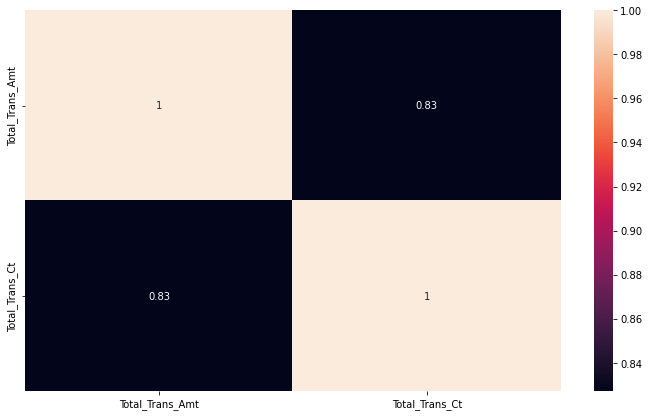

In [ ]:
question4("Attrited Customer")

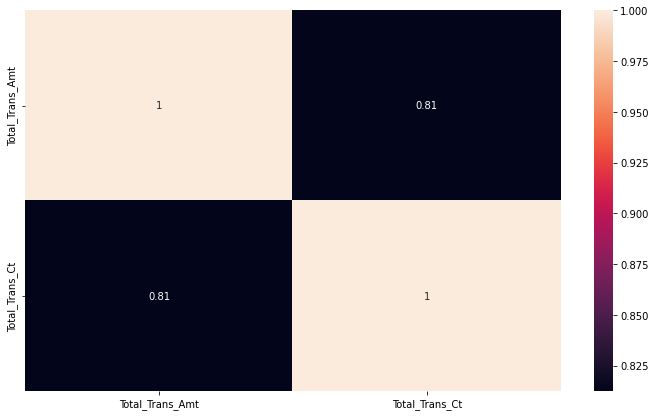

In [ ]:
question4("Existing Customer")

Both Attrited customer and existing customer the **Total_Trans_Amt** and **Total_Trans_Ct** have positive correlation
___

## Advanced Statistic
**Dataset:** https://www.kaggle.com/sakshigoyal7/credit-card-customers 

Dalam dataset the Bank Churn, Credit limit & Avg_open_to_buy kolom memiliki korelasi yang tinggi. Anda diminta untuk melakukan analisis hipotesis untuk mencari tahu apakah sample rata-rata credit limit dan sampel rata-rata avg of avg_open_to_buy berada di rentang rata-rata kedua populasi kolom tersebut
- Ambil 50 samples
- Tingkat kepercayaan (confidence interval) 95%
- Jenis tes mana yang anda pilih? z-test atau t-test, mengapa?

Note:
- H0: two group means are equal
- H1: two group means are different



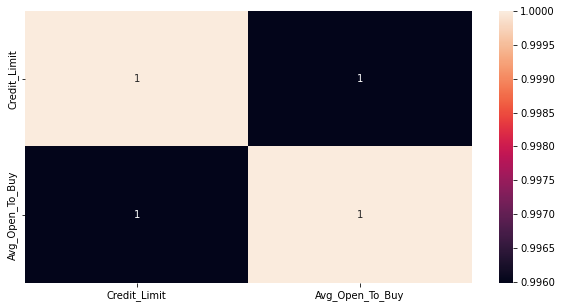

In [ ]:
# correlation
data_new = data[["Credit_Limit", "Avg_Open_To_Buy"]]

plt.figure(figsize=(10,5))
sns.heatmap(data_new.corr(), annot=True)

### Question 1

In [ ]:
def sampling(kolom):
  data_new = data[kolom].sample(n=50)

  return data_new

In [ ]:
def hypothesis_testing_two_sample(kolom1, kolom2):

  sample_1 = sampling(kolom1)
  sample_2 = sampling(kolom2)

  significant_level = 0.005

  ztest_score, pvalue = ztest(x1=sample_1, x2=sample_2, value=0, alternative='two-sided')

  if pvalue > significant_level:
    print("Accept Hypothesis because pvalue: {} > significant_level {}".format(round(pvalue,3), significant_level))

  else:
    print("Reject Hypothesis because pvalue: {} < significant_level {}".format(round(pvalue,3), significant_level))

In [ ]:
hypothesis_testing_two_sample("Credit_Limit", "Avg_Open_To_Buy")

Accept Hypothesis because pvalue: 0.428 > confidence_level 0.005


Because the question is to take 50 samples, therefore z-test can be applied in this question